# Principal Component Analysis on MNIST Dataset

#### For this task I have downloaded the data from kaggle 
https://www.kaggle.com/c/digit-recognizer/data?select=train.csv



We know that MNIST data set is a dataset containing information abaout hand written numerical character in which each pixel is of 28x28 which is present in 784 dimensions. For training data we have 42000 such data points which in result give a matrix of 42000x784.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh

## Loading the data 

In [2]:
df=pd.read_csv("mnist_train.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
## Since in above case we can see that label is also given for each of the data points so first we will separate labels and data
df_l=df['label']
data=df.drop('label' , axis=1)

In [5]:
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We know have separate 784 features for each data points.
Also we have separate data for labels so that we can verify our results.

In [6]:
data.shape

(42000, 784)

We can see that we have a dataset with large dimensions so visualization methods like pair plot, scatter plot etc., for 2d or 3d will not work here, so for this we will use Principal Component Ananlysis.

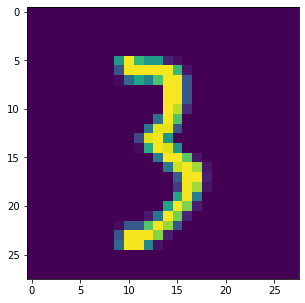

Label for this data point is : 3


In [7]:
## Before proceeding further we will first test our data is correct and also we have done correct separation or not

## For checking purpose we will take data point at any index and check if it matches with its label or not

plt.figure(figsize=(5,5))
index_value=234
fig_data=data.iloc[index_value].to_numpy().reshape(28,28)
plt.imshow(fig_data)
plt.show()


print("Label for this data point is : {}".format(df_l[index_value]))

## Applying PCA

Instead of direct using sklearn library I will first do the custom implementation by finding coavariance matrix, eigen value and eigen vectors and then I will compare the result with the result using sklearn library.

In [8]:
## Standardizing the data
labels = df_l
data = data
print("the shape of sample data = ", data.shape)
standardized_data=StandardScaler().fit_transform(data)
standardized_data.shape

the shape of sample data =  (42000, 784)


(42000, 784)

In [9]:


#find the co-variance matrix
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)
covar_matrix=(covar_matrix/data.shape[0])

print ( "The shape of variance matrix = ", covar_matrix.shape)


The shape of variance matrix =  (784, 784)


In [10]:
## finding eigen value and corresponding eigen vectors

## we know that 70%-75% of the total variance of data is explained by first 2 principal components so I will choose first two components

values, vectors = eigh(covar_matrix, eigvals=(782,783))


In [11]:
print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [12]:
# multiplying obtained eigen vectors with sample data to obtain the new coordinates

new_coordinates=np.matmul(vectors,sample_data.T)
new_coordinates.shape

(2, 42000)

In [13]:
## adding labels to the newly obtained data points

new_data=np.vstack((new_coordinates,labels)).T

In [14]:
## converting this data to a new dataframe 

dataframe=pd.DataFrame(new_data,columns=("1st PCA","2nd PCA","labels"))
dataframe.head()

,1st PCA,2nd PCA,labels
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


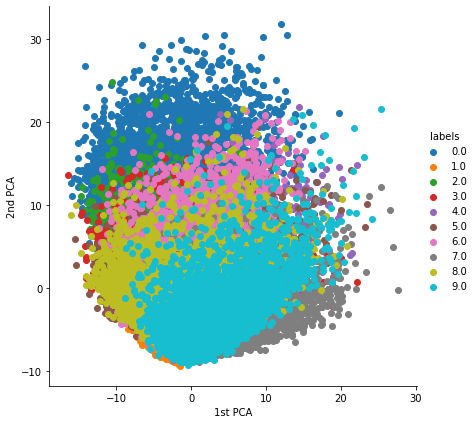

In [15]:
## Creating visualization
sn.FacetGrid(dataframe, hue="labels", height=6).map(plt.scatter, '1st PCA', '2nd PCA').add_legend()
plt.show()

## Comparing our custom implementation with scikit learn results

In [16]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [17]:
## fitting the data
pca.n_components = 2  ## since we are considering only 2 principal components to visualize in 2d
pca_data = pca.fit_transform(sample_data)
pca_data.shape

(42000, 2)

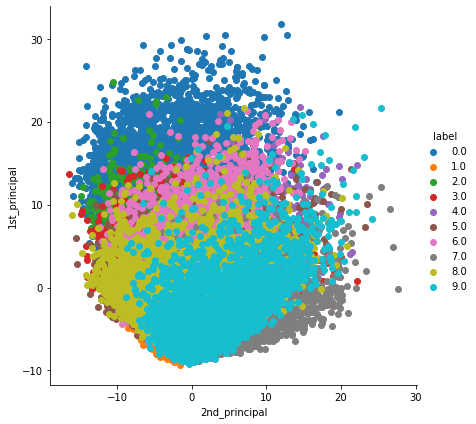

In [18]:
## creating the plot
pca_data = np.vstack((pca_data.T, labels)).T
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '2nd_principal', '1st_principal').add_legend()
plt.show()

## Observations

So we have reduced dimensions of data from 784 to 2 dimensions and created visulization for the dataset.
We can observe that data are partially separated but not completely separated so we cannot make clear assumptions about the data from the above graph but consequently we observe that data points for same digits are grouped together like all points of 0 digit lie only in the upper part with blue dots similarly all points for digit 7 are groped below in grey dots and so on for other digits.

# PCA for dimensionality reduction

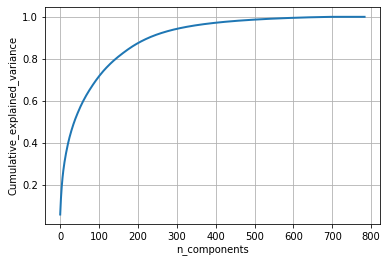

In [19]:
## finding all principal components
pca.n_components = 784   
pca_data = pca.fit_transform(sample_data)


## calculating the percentage of variance explained by each component
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

## finding the cummulattive sum to plot the graph
cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

## Observation
From the above plot we can see that when we take almost 200 principal components instead of 784 components then 90% of the total variance is explained, so we can consider 200 components only for getting insights of the data which can save our time upto a large extenct.